In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(   # E&T
    root='./data/FashionMNIST',                  # 指定数据存放位置
    train=True,                                  # 下载训练集（6万张）
    download=True,                               # 如果数据不在指定目录，就下载
    transform=transforms.Compose([               # 图像m预处理
        transforms.ToTensor()                    # 转换成Tensor
    ])
)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10                     # 默认batch_size=1
)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)            # 设置输出的行高

In [4]:
len(train_set)

60000

In [7]:
train_set.targets                   # label

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_set.train_labels.bincount()   # 每个类别都有6000个样本（即0-9每个都出现6000次），称这种数据集为平衡数据集

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [9]:
iter(train_set)

In [10]:
sample = next(iter(train_set))      # 调用iterator的__next__函数获取下一个元素

In [11]:
len(sample)

2

In [12]:
type(sample)                        # (image, label)

tuple

In [14]:
image, label = sample

In [15]:
image.shape

torch.Size([1, 28, 28])

In [16]:
label.shape

AttributeError: 'int' object has no attribute 'shape'

label: 9


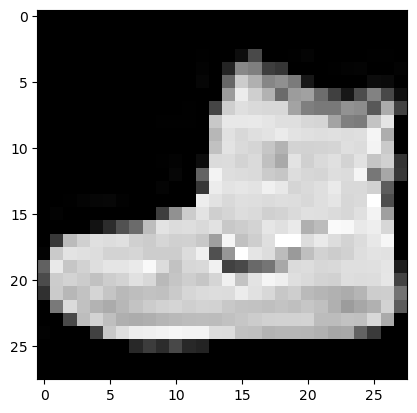

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

## Working with batches of data

In [19]:
batch = next(iter(train_loader))

In [20]:
len(batch)

2

In [26]:
type(batch)                       # 包含10个(image, label)的列表

list

In [22]:
images, labels = batch

In [24]:
images.shape

torch.Size([10, 1, 28, 28])

In [27]:
labels.shape

torch.Size([10])

### 用torchvision.utils.make_grid函数一次画出整批图像

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


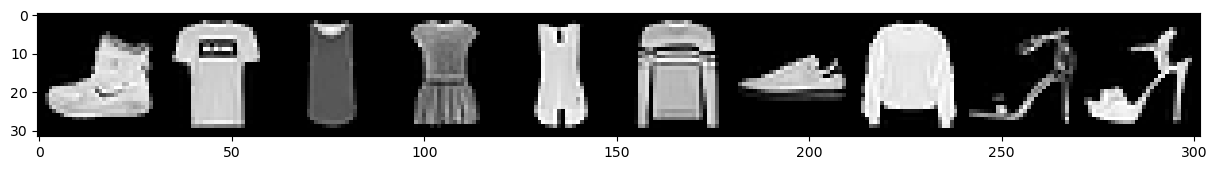

In [35]:
grid = torchvision.utils.make_grid(images, nrow=10)        # 创建一个网格，一行10格

plt.figure(figsize=(15, 15))               # 调整每幅图的大小
plt.imshow(np.transpose(grid, (1, 2, 0)))

print("labels:", labels)